In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Capital Bike Share DataFrames
df_h = pd.read_csv('hour.csv')
df_d = pd.read_csv('day.csv')

## Following are the steps
### STEP-1: Exploratory Data Analysis
### STEP-2: Correlation check between *Bicycle_count* (dependent variable) and other features (independent variables)
### STEP-3: Plotting Features like season, hour, weekday for *Bicycle_count*

### STEP-1: Exploratory Data Analysis
- Shape
- Head (print top 5 values as default)
- Missing values
- data type

In [4]:
print(df_h.shape)
print(df_d.shape)

(17379, 17)
(731, 16)


In [5]:
df_h.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df_h.dteday = pd.to_datetime(df_h.dteday)
df_h.loc[:,'day'] = df_h.dteday.dt.day
df_h.loc[:,'weekday'] = df_h.dteday.dt.day_name()
df_h.loc[:,'month'] = df_h.dteday.dt.month_name()
df_h.loc[:,'yr'] = df_h.dteday.dt.year

In [7]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,January
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,January
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,January
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,January
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,January


In [8]:
df_h.describe()

,instant,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,2011.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.683411
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,8.789373
min,1.0000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,2011.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000
50%,8690.0000,3.000000,2012.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000
75%,13034.5000,3.000000,2012.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.000000
max,17379.0000,4.000000,2012.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,31.000000


In [9]:
# Checking Null/no value cells in the DF
df_h.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
month         0
dtype: int64

### STEP-2: Correlation check between *Bicycle_count* (dependent variable) and other features (independent variables)
- Plotting Heat map for the visualization

In [10]:
df_h.corr().abs()[['cnt']]

,cnt
instant,0.278379
season,0.178056
yr,0.250495
mnth,0.120638
hr,0.394071
holiday,0.030927
workingday,0.030284
weathersit,0.142426
temp,0.404772
atemp,0.400929


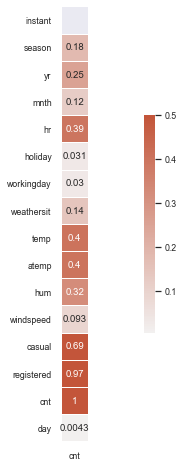

In [11]:
plt.figure(figsize=(20,8))

sns.set(font_scale=0.8)

mask = np.triu(df_h.corr().abs()[['cnt']])
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_h.corr().abs()[['cnt']], annot=True, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.show()

### STEP-3: Plotting Features like seasons, hour, weekday for *Bicycle_count*
- Season effect on Bicycle users
What can we determine from the data?
From an examination of the data, it was decided that several questions could be addressed:

Does season affect bikeshare usage?
Do ridership trends vary based on type of membership?
Does weather affect bikeshare usage?
What would be a valuable direction for further investigation?

In [12]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'month'],
      dtype='object')

## 1- Season

In [13]:
df_h.loc[df_h['season'] == 1, 'SEASON'] = 'Spring'
df_h.loc[df_h['season'] == 2, 'SEASON'] = 'Summer'
df_h.loc[df_h['season'] == 3, 'SEASON'] = 'Fall/Autumn'
df_h.loc[df_h['season'] == 4, 'SEASON'] = 'Winter'

In [14]:
df_h.SEASON.value_counts()

Fall/Autumn    4496
Summer         4409
Spring         4242
Winter         4232
Name: SEASON, dtype: int64

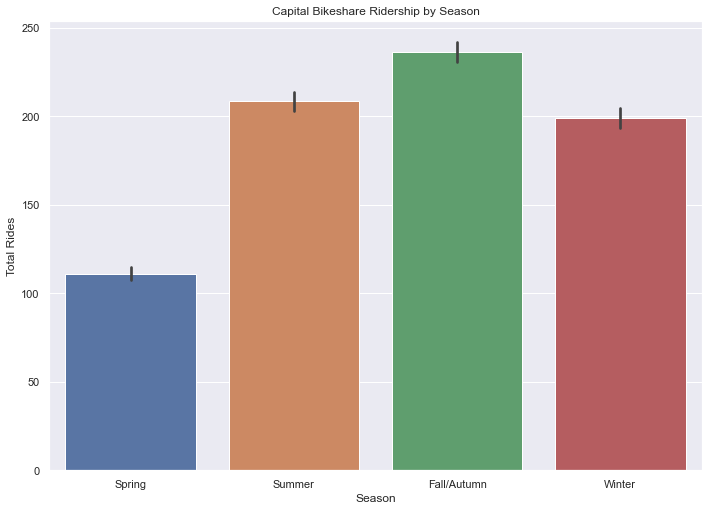

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
sns.barplot(data=df_h[['SEASON','cnt']], x='SEASON', y='cnt', ax=ax)

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')
plt.show()

In [16]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,SEASON
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,January,Spring
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,January,Spring
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,January,Spring
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,January,Spring
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,January,Spring


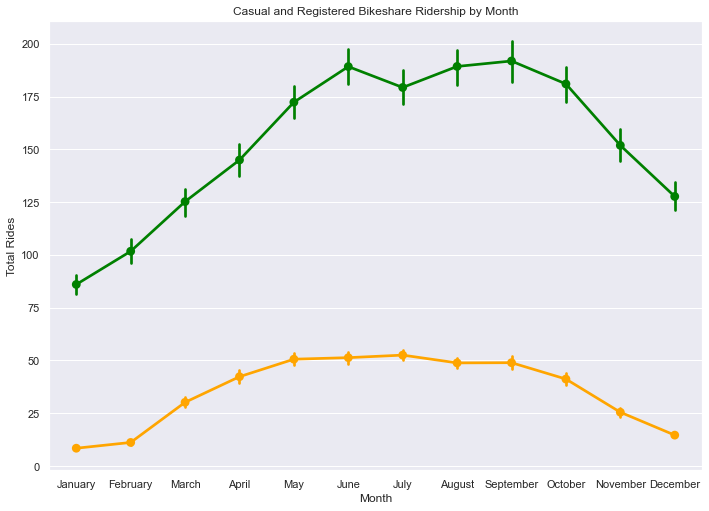

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['month', 'casual', 'registered']], x='month', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['month', 'casual', 'registered']], x='month', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

## 2- Weather

In [18]:
df_h.loc[df_h['weathersit'] == 1, 'weather'] = 'Clear'
df_h.loc[df_h['weathersit'] == 2, 'weather'] = 'Cloudy'
df_h.loc[df_h['weathersit'] == 3, 'weather'] = 'Light_Rain'
df_h.loc[df_h['weathersit'] == 4, 'weather'] = 'Heavy_Rain'

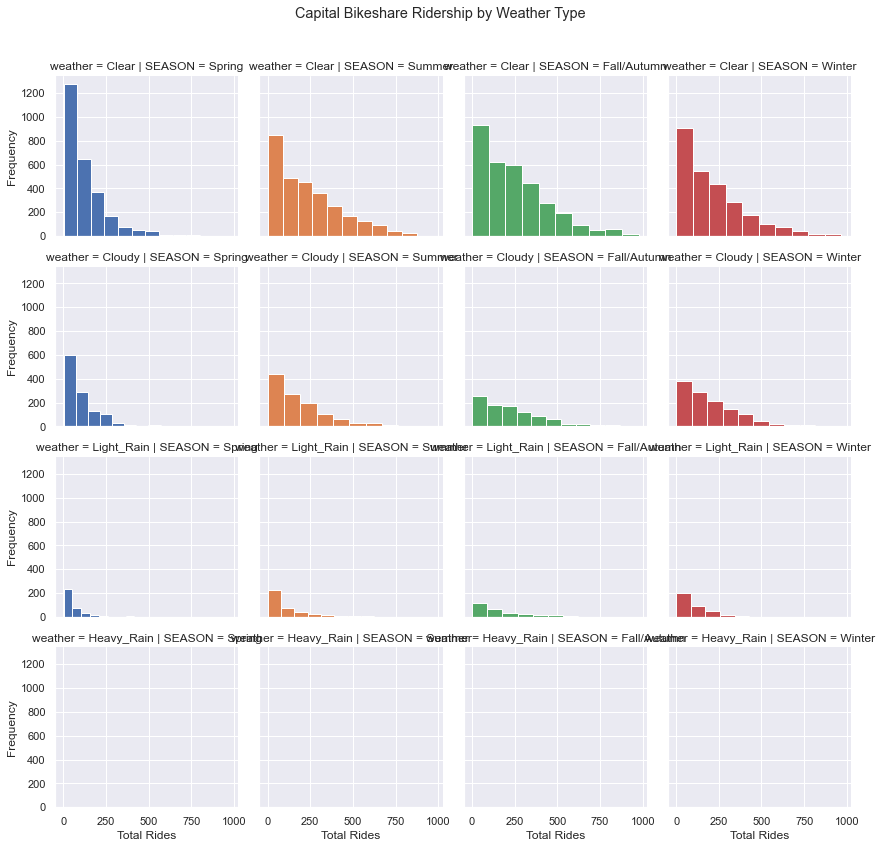

In [19]:

g = sns.FacetGrid(data=df_h, col='SEASON', row='weather',hue='SEASON')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

In [1]:
sns.countplot(x='SEASON', data=df_h, hue='weather', dodge=True)

NameError: name 'sns' is not defined

In [32]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,SEASON,weather,day,month
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,...,0.2879,0.81,0.0,3,13,16,Spring,Clear,1,January
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,...,0.2727,0.80,0.0,8,32,40,Spring,Clear,1,January
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,...,0.2727,0.80,0.0,5,27,32,Spring,Clear,1,January
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,...,0.2879,0.75,0.0,3,10,13,Spring,Clear,1,January
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,...,0.2879,0.75,0.0,0,1,1,Spring,Clear,1,January


## 3- Workingday and Holiday

In [34]:
df_h.loc[df_h['holiday'] == 0, 'HOLIDAY'] = 'No'
df_h.loc[df_h['holiday'] == 1, 'HOLIDAY'] = 'Yes'

In [35]:
df_h.loc[df_h['workingday'] == 0, 'WORKINGDAY'] = 'No'
df_h.loc[df_h['workingday'] == 1, 'WORKINGDAY'] = 'Yes'

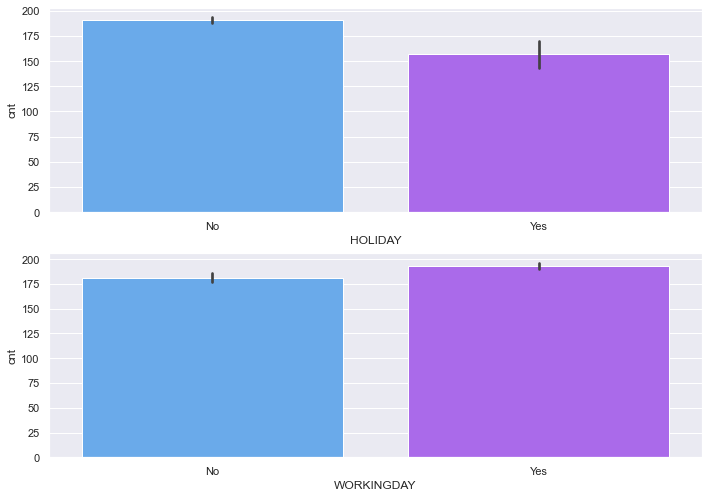

In [49]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_h[['HOLIDAY', 'cnt']], x='HOLIDAY', y='cnt', palette='cool', ax=ax[0])
sns.barplot(data=df_h[['WORKINGDAY', 'cnt']], x='WORKINGDAY', y='cnt', palette='cool', ax=ax[1])


#plt.title('Casual and Registered Bikeshare Ridership by Month')
#plt.ylabel('Total Rides')
#plt.xlabel('Time')

plt.show()

## 4- Weekday vs Bike ride

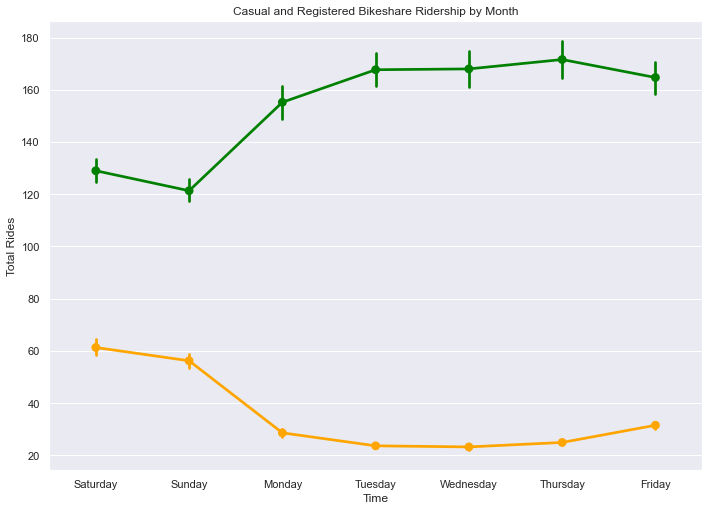

In [50]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['weekday', 'casual', 'registered']], x='weekday', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['weekday', 'casual', 'registered']], x='weekday', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

## 5- Day time distribution for Bike riders

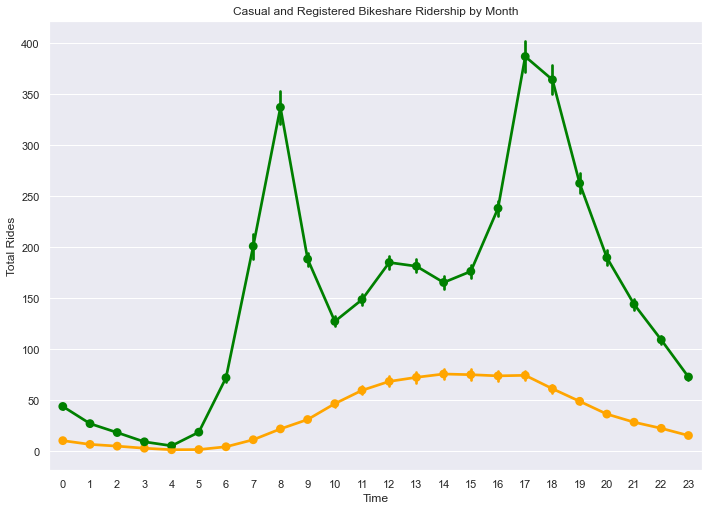

In [51]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

<AxesSubplot:>

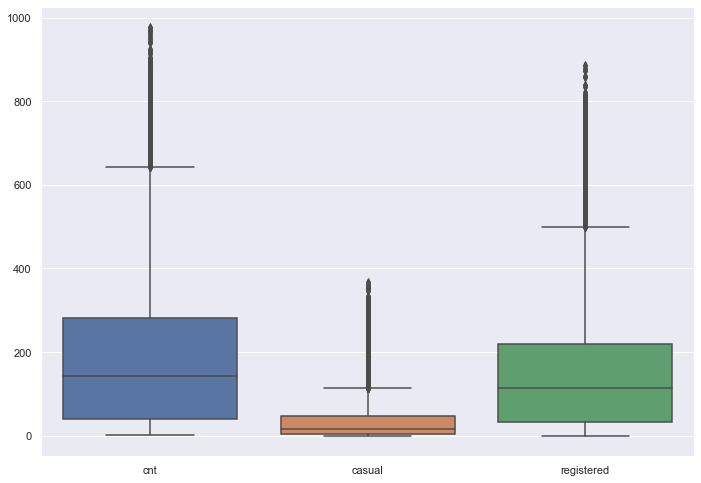

In [39]:
fig = plt.subplot()
sns.boxplot(data=df_h[['cnt', 'casual', 'registered']])

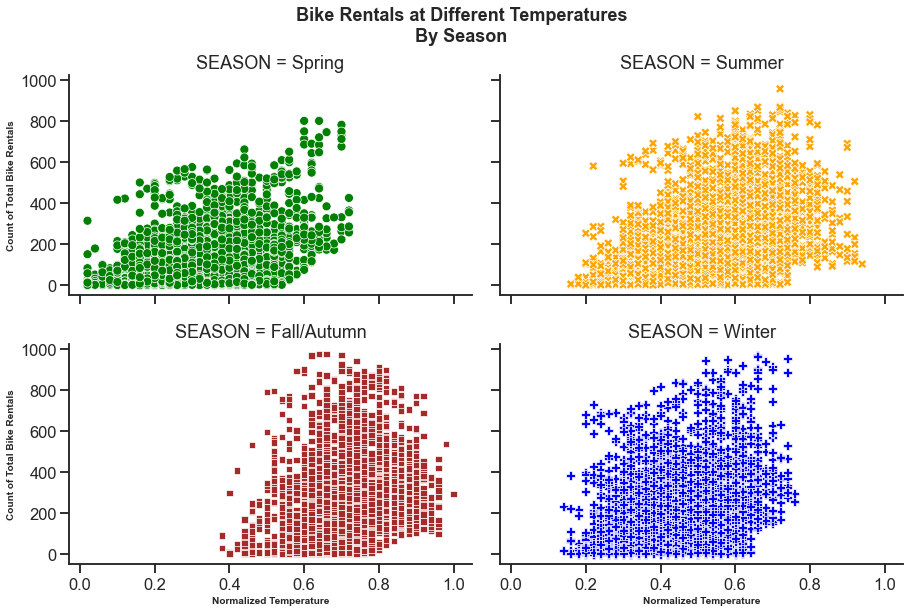

In [329]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g = sns.relplot(x='temp', y='cnt', hue='SEASON', data=df_h,palette=['green','orange','brown','blue'],
                col='SEASON', col_wrap=2, legend=False,
                height=4, aspect=1.6, style='SEASON', sizes=(300,500))

g.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Normalized Temperature",fontweight='bold', size=10)
g.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=10);

(0.0, 24.15)

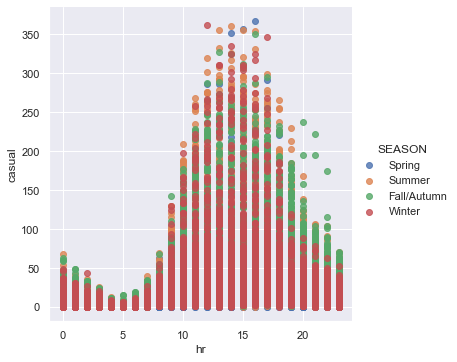

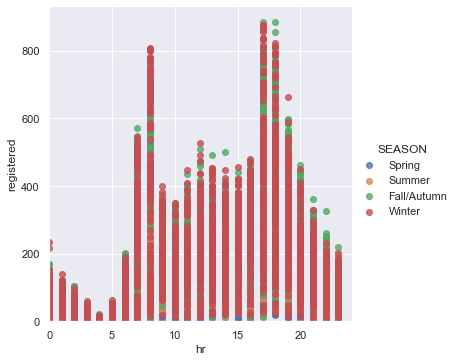

In [271]:
#fig, ax = plt.subplots(2,1)
sns.lmplot(x='hr', y='casual', data=df_h, fit_reg=False, hue='SEASON')
sns.lmplot(x='hr', y='registered', data=df_h, fit_reg=False, hue='SEASON')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

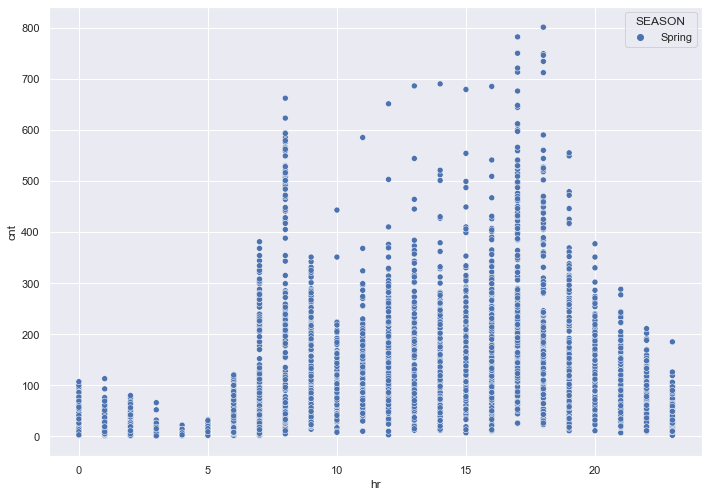

In [181]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='hr', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Spring']), style='SEASON', legend='full')

<AxesSubplot:xlabel='hr', ylabel='cnt'>

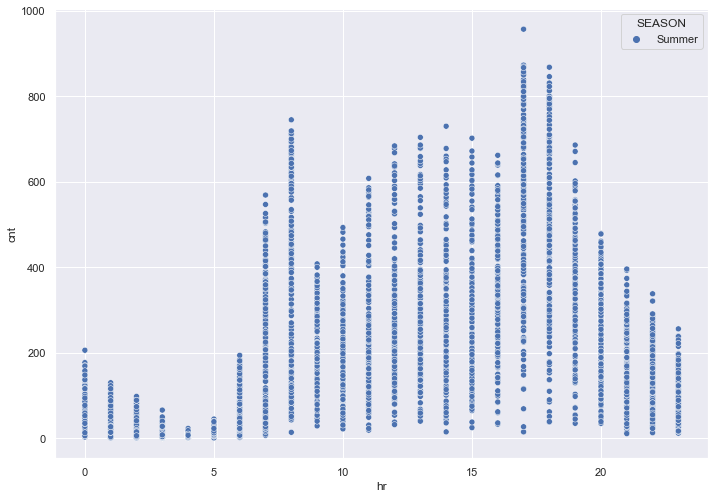

In [182]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='hr', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Summer']), style='SEASON', legend='full')

In [1]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.catplot(x='hr', y='cnt', hue='SEASON', data=df_h)

NameError: name 'sns' is not defined

In [2]:
sns.catplot(x='weekday', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Summer']))

NameError: name 'sns' is not defined